In [86]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier, svm
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import textblob
import transformers

In [87]:
df = pd.read_csv('../data/data.csv')
authors_df = pd.read_csv("../data/authors.csv")

In [88]:
df.head()

,pseudo_id,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,createdAt,lang,isReply,pseudo_conversationId,pseudo_inReplyToUsername,pseudo_author_userName,quoted_pseudo_id,author_isBlueVerified
0,335098644261566,CLEARLY WHY ROBINSO. KILLED CHARLIE KIRK\nChec...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,False,335098644261566,NaN,683805731746893,NaN,False
1,993437939265218,@695242549121979 Charlie Kirk didn’t deserve t...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,480787180308238,6.952425e+14,772698505691224,NaN,False
2,51368227215922,@396187379099632 @576794151260665 Post them he...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,687917658001246,3.961874e+14,62423919865749,NaN,False
3,554840011206382,@805230134765227 @718955815577256 So why post ...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,149526965769593,8.052301e+14,23702770839054,NaN,False
4,175456055441216,Here’s a reality of dealing with the death of ...,0,0,0,0,0,0,2025-09-13 00:12:31+00:00,en,False,175456055441216,NaN,686884260868392,NaN,True


In [89]:
authors_df.columns

Index(['author_userName', 'author_createdAt', 'obfuscated_userName',
       'author_profile_bio_description', 'author_location', 'author_followers',
       'author_following', 'author_isBlueVerified'],
      dtype='object')

In [90]:
authors_df

,author_userName,author_createdAt,obfuscated_userName,author_profile_bio_description,author_location,author_followers,author_following,author_isBlueVerified
0,01IOTA,2010-11-04 16:20:51+00:00,@292512269517606,Two accounts for two topics\n@01iota is Christ...,"St Johns County, Free Florida",167533,133154,True
1,0ccultbot,2015-12-19 21:47:37+00:00,@608765984246811,"Occult, Esotericism, Symbolism, Secret Societi...",NaN,466752,214,True
2,0HOUR1__,2015-12-28 01:28:06+00:00,@300496301105995,Live Radio and News\n\nTips\n\nhttps://t.co/kj...,Cyberspace,179000,1925,True
3,0liviajulianna,2020-07-23 17:44:45+00:00,@165011622845048,Texas Tough. Big Mouthed Liberal. All opinions...,"Houston, TX",322488,6350,True
4,0rf,2009-06-07 23:32:42+00:00,@28189089601774,Investigative video creator,USA,111043,833,True
...,...,...,...,...,...,...,...,...
4237,zoltanspox,2012-01-25 06:55:04+00:00,@925701050163232,"🇭🇺 SecState for International Communication, I...","Budapest, Hungary",50876,973,True
4238,ztisdale,2009-06-25 22:52:55+00:00,@963349738609576,President of Tisdale Analytics. Opinions my own.,NaN,63482,1785,True
4239,zukunft37,2015-11-28 20:26:55+00:00,@660741261058402,GRUNDRECHTE SIND NICHT VERHANDELBAR!\nGegen st...,Planet Erde (glaube ich),50561,13019,True
4240,zuricht94,2010-05-13 02:02:21+00:00,@426583941451244,ContraCara: La otra verdad. Si el socialismo l...,"Zúrich, Suiza",160577,1604,True


In [91]:
df['author_isBlueVerified'].value_counts()

author_isBlueVerified
False    340877
True     168077
Name: count, dtype: int64

In [92]:
df.describe()

,pseudo_id,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,pseudo_conversationId,pseudo_inReplyToUsername,pseudo_author_userName,quoted_pseudo_id
count,5.089540e+05,508954.000000,508954.000000,508954.000000,508954.000000,5.089540e+05,508954.000000,5.089540e+05,2.490920e+05,5.089540e+05,5.735000e+04
mean,5.001828e+14,13.566753,5.229866,83.488005,1.051099,4.715115e+03,4.912540,5.016162e+14,5.035395e+14,5.011435e+14,5.007986e+14
std,2.887466e+14,323.516238,149.044612,2113.534007,45.266649,1.695158e+05,159.341835,2.887362e+14,2.917353e+14,2.817860e+14,2.844535e+14
min,1.281369e+10,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.281369e+10,1.033841e+09,2.614282e+09,9.594408e+10
25%,2.497579e+14,0.000000,0.000000,0.000000,0.000000,4.500000e+01,0.000000,2.534822e+14,2.607047e+14,2.627215e+14,2.650322e+14
50%,5.009986e+14,0.000000,0.000000,0.000000,0.000000,8.300000e+01,0.000000,5.009844e+14,4.986923e+14,5.154337e+14,4.892937e+14
75%,7.495347e+14,0.000000,1.000000,2.000000,0.000000,2.300000e+02,0.000000,7.524995e+14,7.630646e+14,7.385308e+14,7.484905e+14
max,9.999933e+14,43605.000000,29971.000000,452071.000000,19237.000000,5.793046e+07,32888.000000,9.999911e+14,9.999830e+14,9.999911e+14,9.999934e+14


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508954 entries, 0 to 508953
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   pseudo_id                 508954 non-null  int64  
 1   text                      508954 non-null  object 
 2   retweetCount              508954 non-null  int64  
 3   replyCount                508954 non-null  int64  
 4   likeCount                 508954 non-null  int64  
 5   quoteCount                508954 non-null  int64  
 6   viewCount                 508954 non-null  int64  
 7   bookmarkCount             508954 non-null  int64  
 8   createdAt                 508954 non-null  object 
 9   lang                      508954 non-null  object 
 10  isReply                   508954 non-null  bool   
 11  pseudo_conversationId     508954 non-null  int64  
 12  pseudo_inReplyToUsername  249092 non-null  float64
 13  pseudo_author_userName    508954 non-null  i

In [94]:
sentiment_analyzer = SentimentAnalyzer()

In [95]:
df['text'] = df['text'].str.lower()

In [96]:
stemmer = PorterStemmer()
df['text'] = df['text'].apply(lambda x : stemmer.stem(x))

In [97]:
sia = SentimentIntensityAnalyzer()
df['polarity'] = df['text'].apply(lambda x : sia.polarity_scores(x)['compound'])


In [98]:
df[['neg', 'neu', 'pos', 'compound']] = df['text'].apply(lambda x :pd.Series(sia.polarity_scores(x)))

In [99]:
df = df.drop(['polarity'], axis = 1 )

In [100]:
df

,pseudo_id,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,createdAt,lang,isReply,pseudo_conversationId,pseudo_inReplyToUsername,pseudo_author_userName,quoted_pseudo_id,author_isBlueVerified,neg,neu,pos,compound
0,335098644261566,clearly why robinso. killed charlie kirk\nchec...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,False,335098644261566,NaN,683805731746893,NaN,False,0.274,0.572,0.154,-0.4753
1,993437939265218,@695242549121979 charlie kirk didn’t deserve t...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,480787180308238,6.952425e+14,772698505691224,NaN,False,0.397,0.495,0.109,-0.9247
2,51368227215922,@396187379099632 @576794151260665 post them he...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,687917658001246,3.961874e+14,62423919865749,NaN,False,0.113,0.832,0.056,-0.5073
3,554840011206382,@805230134765227 @718955815577256 so why post ...,0,0,0,0,0,0,2025-09-13 00:12:32+00:00,en,True,149526965769593,8.052301e+14,23702770839054,NaN,False,0.189,0.811,0.000,-0.7906
4,175456055441216,here’s a reality of dealing with the death of ...,0,0,0,0,0,0,2025-09-13 00:12:31+00:00,en,False,175456055441216,NaN,686884260868392,NaN,True,0.238,0.619,0.143,-0.8876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508949,819732462105022,@65603385733249 charlie kirk said that most ra...,0,0,10,0,135,0,2025-09-11 23:55:57+00:00,en,True,257445698759983,6.560339e+13,354059363698196,NaN,False,0.301,0.653,0.046,-0.9514
508950,73609571284714,"charlie kirk shooting , who are these ppl http...",0,0,0,0,236,1,2025-09-11 23:55:57+00:00,en,False,73609571284714,NaN,6610800848517,NaN,False,0.000,1.000,0.000,0.0000
508951,439099511202634,@439855071715699 @705418196428268 @51543373435...,0,1,0,0,51,0,2025-09-11 23:55:57+00:00,en,True,211746730826638,4.398551e+14,641485247051819,NaN,False,0.267,0.479,0.253,-0.0516
508952,71274730701414,@11526172127312 trump was completely out - lad...,0,0,0,0,48,0,2025-09-11 23:55:57+00:00,en,True,395108507934805,1.152617e+13,946904101706195,NaN,False,0.090,0.802,0.108,0.4497


In [101]:
df['positive_sentiment'] = (df['compound'] > 0).astype(int)


In [102]:
df['createdAt'] = pd.to_datetime(df['createdAt'], format = "mixed")
df['createdAt']

0        2025-09-13 00:12:32+00:00
1        2025-09-13 00:12:32+00:00
2        2025-09-13 00:12:32+00:00
3        2025-09-13 00:12:32+00:00
4        2025-09-13 00:12:31+00:00
                    ...           
508949   2025-09-11 23:55:57+00:00
508950   2025-09-11 23:55:57+00:00
508951   2025-09-11 23:55:57+00:00
508952   2025-09-11 23:55:57+00:00
508953   2025-09-11 23:55:56+00:00
Name: createdAt, Length: 508954, dtype: datetime64[ns, UTC]

In [103]:
df['date'] = df['createdAt'].dt.date
df['date']

0         2025-09-13
1         2025-09-13
2         2025-09-13
3         2025-09-13
4         2025-09-13
             ...    
508949    2025-09-11
508950    2025-09-11
508951    2025-09-11
508952    2025-09-11
508953    2025-09-11
Name: date, Length: 508954, dtype: object

In [114]:
df['day'] = df['createdAt'].dt.day

In [104]:
df['hour'] = df['createdAt'].dt.hour

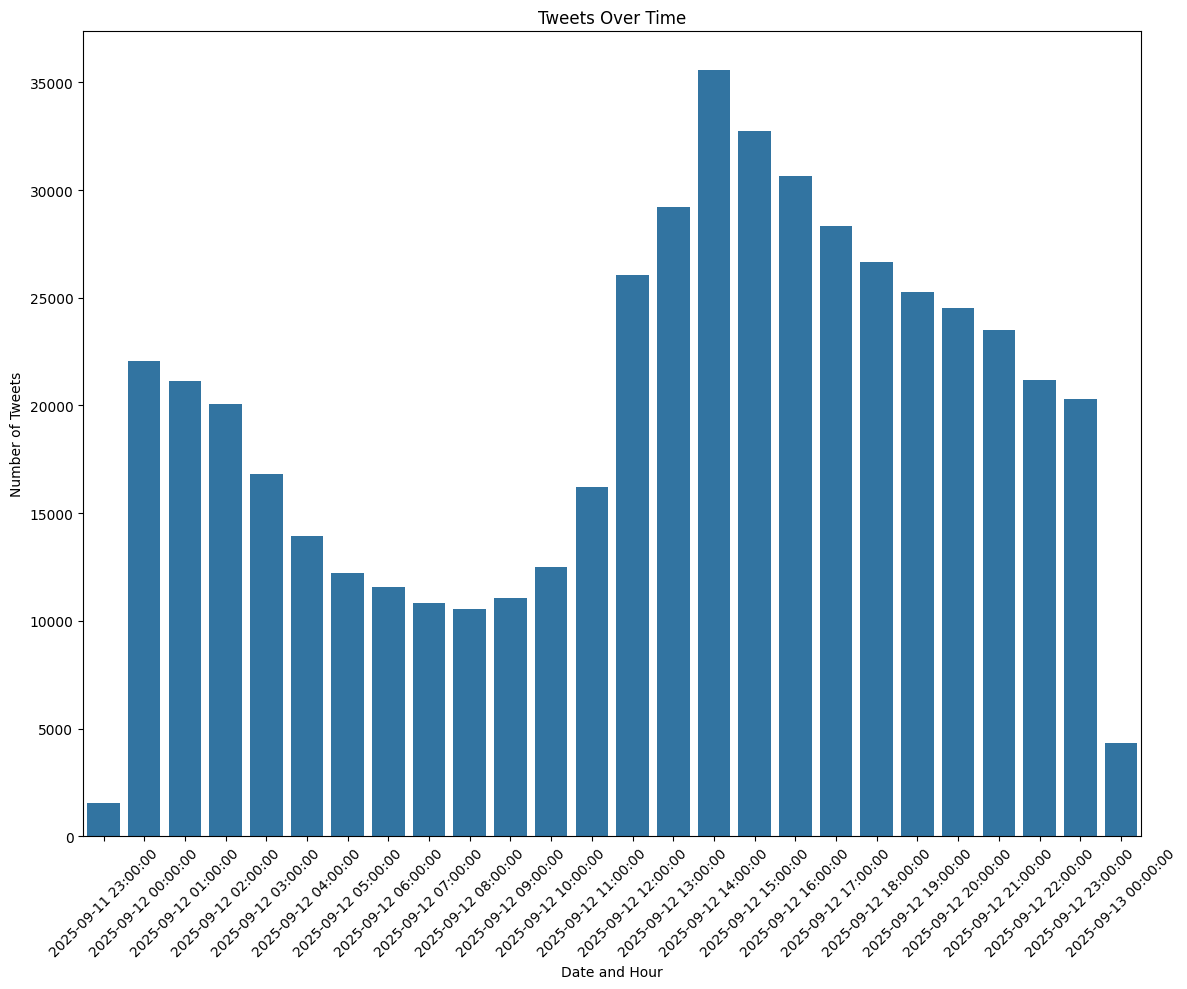

In [123]:
# Create datetime column combining date and hour
df['datetime_hour'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['hour'], unit='h')

# Count tweets per hour
tweets_per_hour = df.groupby('datetime_hour').size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(data=tweets_per_hour, x='datetime_hour', y='count')
plt.xlabel('Date and Hour')
plt.ylabel('Number of Tweets')
plt.title('Tweets Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()